In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample as RS
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import confusion_matrix as c_m
from sklearn.metrics import classification_report as c_r
from sklearn.preprocessing import StandardScaler as ss
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random as rd
import locale
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from biokit.viz import corrplot
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
afterjoin=pd.read_csv("/Users/jiezou/Documents/GitHub/DataMining_project/v8/Version8.csv")

In [3]:
afterjoin.isnull().sum()

Unnamed: 0                     0
id                             0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
neighbourhood_cleansed         0
zipcode                      242
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
security_deposit               0
cleaning_fee                 812
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
cancellation_policy            0
senti_score                    0
walk_score                     0
dtype: int64

In [4]:
afterjoin['cleaning_fee'].value_counts()

$100.00     649
$150.00     502
$50.00      414
$75.00      308
$0.00       302
           ... 
$360.00       1
$445.00       1
$425.00       1
$359.00       1
$295.00       1
Name: cleaning_fee, Length: 186, dtype: int64

In [5]:
afterjoin['cleaning_fee']=afterjoin['cleaning_fee'].fillna(value = "0", axis=0)

In [6]:
afterjoin["cleaning_fee"]=afterjoin["cleaning_fee"].str.replace(r'[^-+\d.]', '').astype('float')

In [7]:
afterjoin['zipcode']=afterjoin['zipcode'].fillna(value = 94110.0, axis=0)

In [8]:
afterjoin.isnull().sum()

Unnamed: 0                   0
id                           0
host_response_time           0
host_response_rate           0
host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
neighbourhood_cleansed       0
zipcode                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
price                        0
security_deposit             0
cleaning_fee                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
instant_bookable             0
cancellation_policy          0
senti_score                  0
walk_score                   0
dtype: int64

In [9]:
afterjoin["cleaning_fee"].value_counts()

0.0      1114
100.0     649
150.0     502
50.0      414
75.0      308
         ... 
688.0       1
54.0        1
124.0       1
21.0        1
249.0       1
Name: cleaning_fee, Length: 186, dtype: int64

In [10]:
afterjoin["zipcode"].value_counts()

94110.0    1191
94117.0     618
94114.0     607
94109.0     562
94103.0     471
94102.0     456
94112.0     367
94107.0     345
94122.0     337
94115.0     287
94131.0     271
94108.0     238
94133.0     238
94123.0     204
94116.0     199
94118.0     197
94121.0     189
94124.0     174
94134.0     143
94127.0     132
94105.0     117
94132.0      76
94158.0      66
94111.0      45
94104.0      11
94113.0       1
94129.0       1
94080.0       1
Name: zipcode, dtype: int64

In [11]:
#convert zipcode data type from float to string
afterjoin['zipcode'] = afterjoin['zipcode'].astype('int32')
afterjoin["zipcode"].value_counts()

94110    1191
94117     618
94114     607
94109     562
94103     471
94102     456
94112     367
94107     345
94122     337
94115     287
94131     271
94133     238
94108     238
94123     204
94116     199
94118     197
94121     189
94124     174
94134     143
94127     132
94105     117
94132      76
94158      66
94111      45
94104      11
94129       1
94080       1
94113       1
Name: zipcode, dtype: int64

In [12]:
afterjoin['zipcode'].value_counts()

94110    1191
94117     618
94114     607
94109     562
94103     471
94102     456
94112     367
94107     345
94122     337
94115     287
94131     271
94133     238
94108     238
94123     204
94116     199
94118     197
94121     189
94124     174
94134     143
94127     132
94105     117
94132      76
94158      66
94111      45
94104      11
94129       1
94080       1
94113       1
Name: zipcode, dtype: int64

In [13]:
afterjoin.info

<bound method DataFrame.info of       Unnamed: 0        id  host_response_time  host_response_rate  \
0              0       958                   1                90.0   
1              1      3850                   1               100.0   
2              2      7918                   1               100.0   
3              3      8142                   1               100.0   
4              4      8339                   2               100.0   
...          ...       ...                 ...                 ...   
7539        7539  37460227                   0                 0.0   
7540        7540  37460323                   1                93.0   
7541        7541  37467170                   0                 0.0   
7542        7542  37469573                   0                 0.0   
7543        7543  37497197                   2               100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        1.0 

In [14]:
#select necessary columns for Analysis & Prediction
data_new= afterjoin.loc[:,['id',
                     'host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'neighbourhood_cleansed',
                     'zipcode',
                     'latitude',
                     'longitude',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'price',
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                     'number_of_reviews',
                     'instant_bookable',
                      'cancellation_policy',
                     'senti_score',
                      'walk_score' ]]
data_new.shape

(7544, 27)

In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 27 columns):
id                           7544 non-null int64
host_response_time           7544 non-null int64
host_response_rate           7544 non-null float64
host_is_superhost            7544 non-null int64
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null int64
neighbourhood_cleansed       7544 non-null int64
zipcode                      7544 non-null int32
latitude                     7544 non-null float64
longitude                    7544 non-null float64
property_type                7544 non-null int64
room_type                    7544 non-null int64
accommodates                 7544 non-null int64
bathrooms                    7544 non-null float64
bedrooms                     7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null int64
price                        7544 non-null flo

In [16]:
data_new.describe()

,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,zipcode,latitude,longitude,...,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,senti_score,walk_score
count,7.544000e+03,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,...,7544.000000,7544.000000,7544.000000,7.544000e+03,7.544000e+03,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000
mean,1.925502e+07,1.301034,86.670864,0.443531,81.283006,0.994565,10.187434,94114.633218,37.766186,-122.429945,...,215.797720,380.455859,98.622747,1.327207e+04,1.379514e+04,44.049973,0.396872,1.834968,0.724107,91.578871
std,1.142713e+07,0.816877,30.977880,0.496834,281.401593,0.073525,8.263740,9.373424,0.022546,0.026725,...,258.190685,702.202771,87.495034,1.151328e+06,1.151323e+06,75.168306,0.489281,0.929686,0.148797,15.077620
min,9.580000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,94080.000000,37.708380,-122.513060,...,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,1.000000,-0.895700,22.000000
25%,8.763266e+06,1.000000,95.000000,0.000000,1.000000,1.000000,3.000000,94109.000000,37.751593,-122.442328,...,100.000000,0.000000,35.000000,2.000000e+00,2.900000e+01,1.000000,0.000000,1.000000,0.702978,92.000000
50%,2.072360e+07,1.000000,100.000000,0.000000,2.000000,1.000000,8.000000,94112.000000,37.768755,-122.424475,...,152.000000,150.000000,85.000000,4.000000e+00,1.800000e+02,11.000000,0.000000,2.000000,0.724107,97.000000
75%,2.984479e+07,2.000000,100.000000,1.000000,10.000000,1.000000,16.000000,94118.000000,37.785488,-122.410720,...,249.000000,500.000000,148.000000,3.000000e+01,1.125000e+03,53.000000,1.000000,2.000000,0.796148,99.000000
max,3.749720e+07,4.000000,100.000000,1.000000,1465.000000,1.000000,36.000000,94158.000000,37.810310,-122.368570,...,8000.000000,5100.000000,700.000000,1.000000e+08,1.000000e+08,730.000000,1.000000,6.000000,0.993200,100.000000


Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy', 'senti_score', 'walk_score'],
      dtype='object')

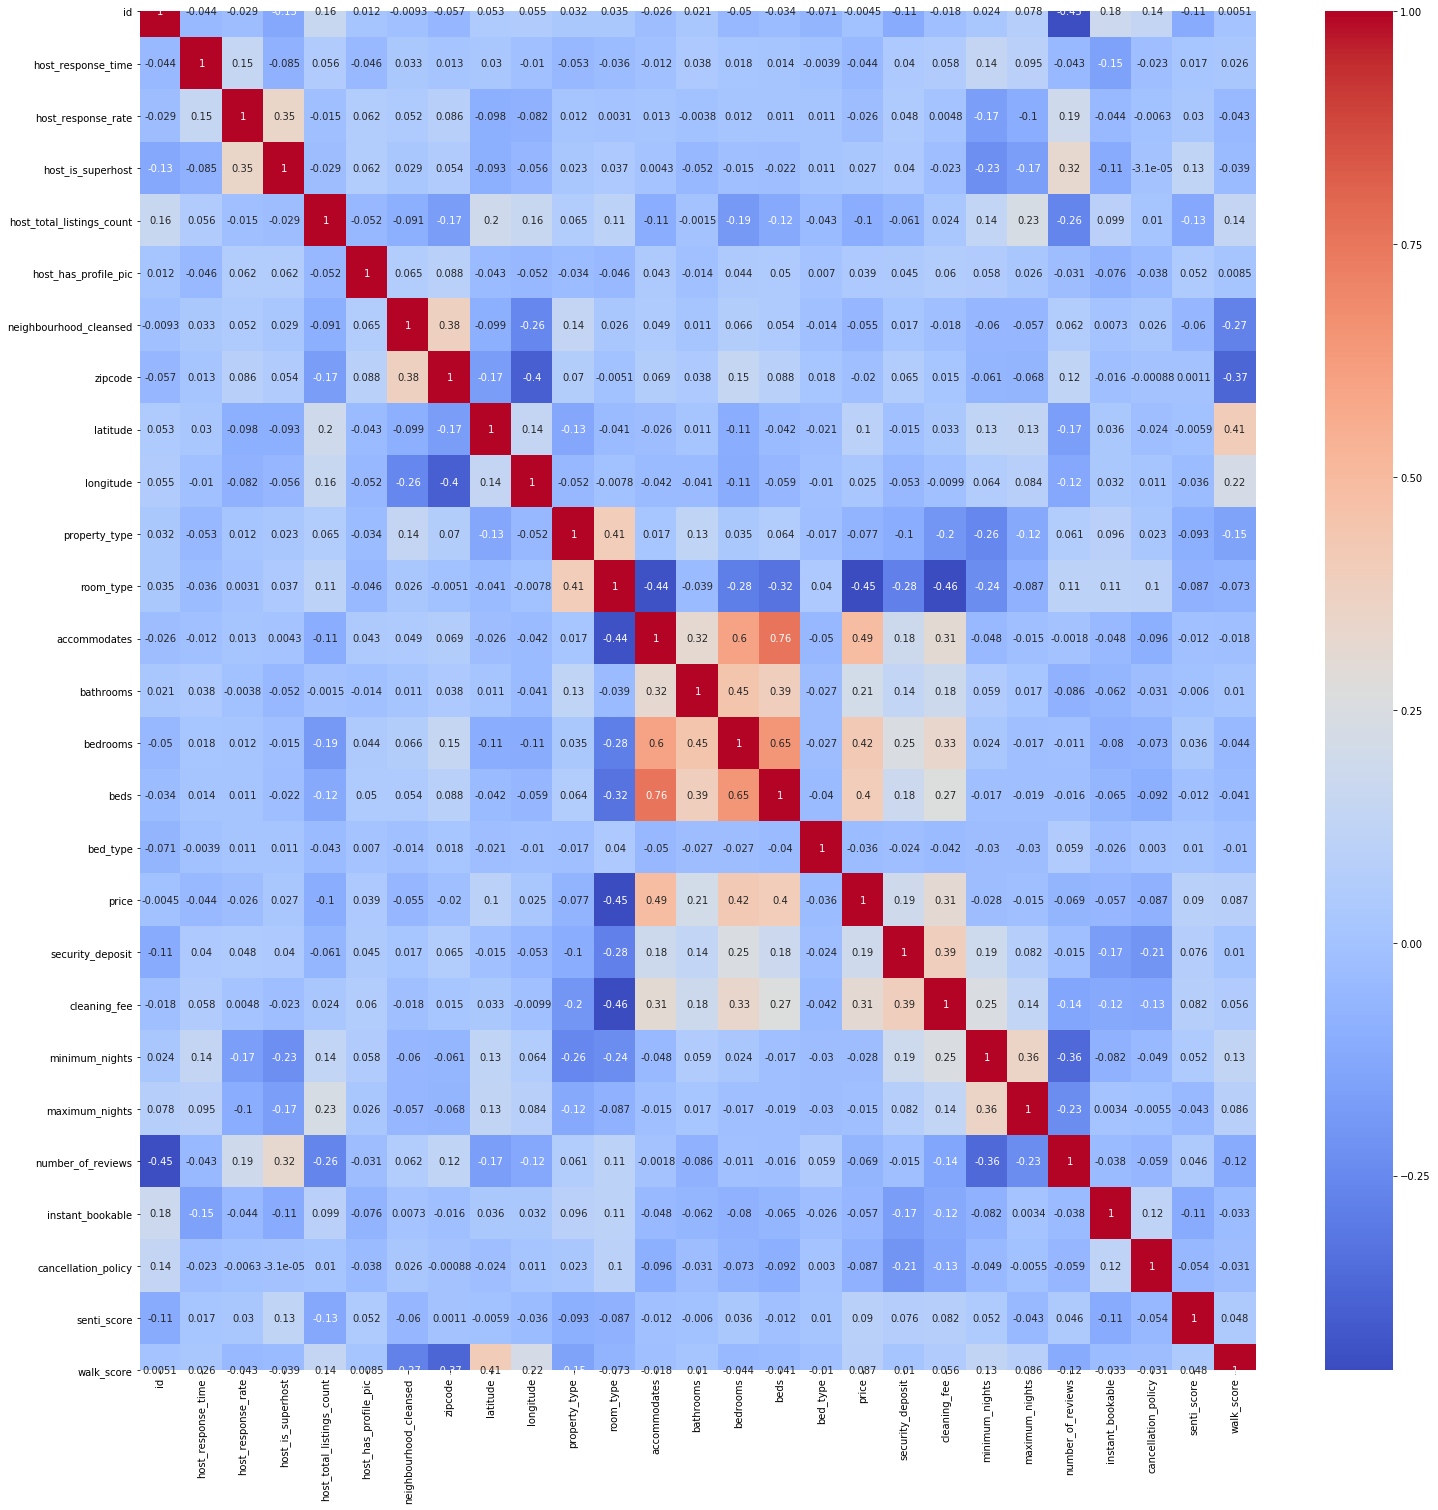

In [17]:
#Get Correlation between different variables
corr = data_new.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True,cmap='coolwarm')
data_new.columns

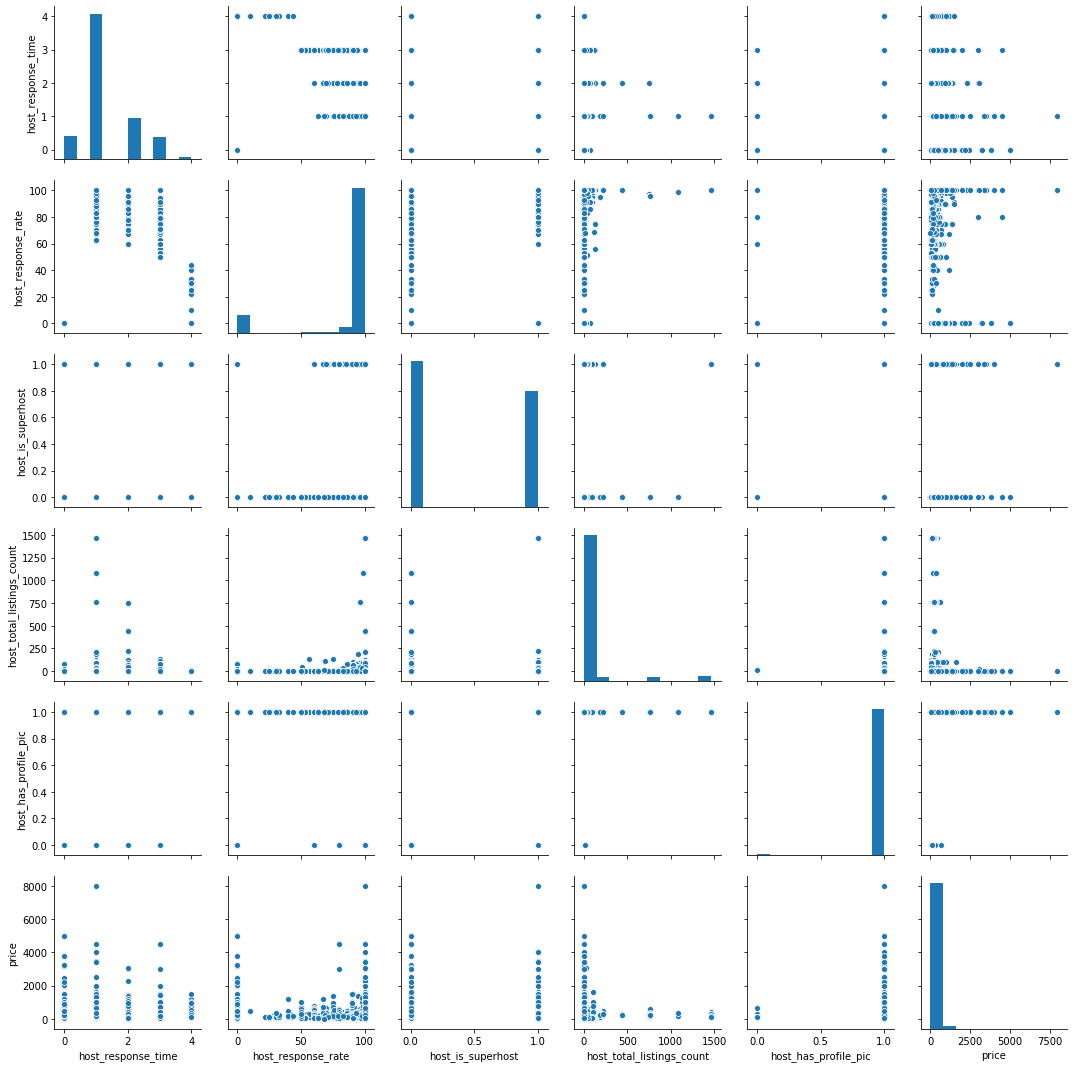

In [18]:
g = sns.pairplot(data_new[['host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'price'
                         ]]
                )

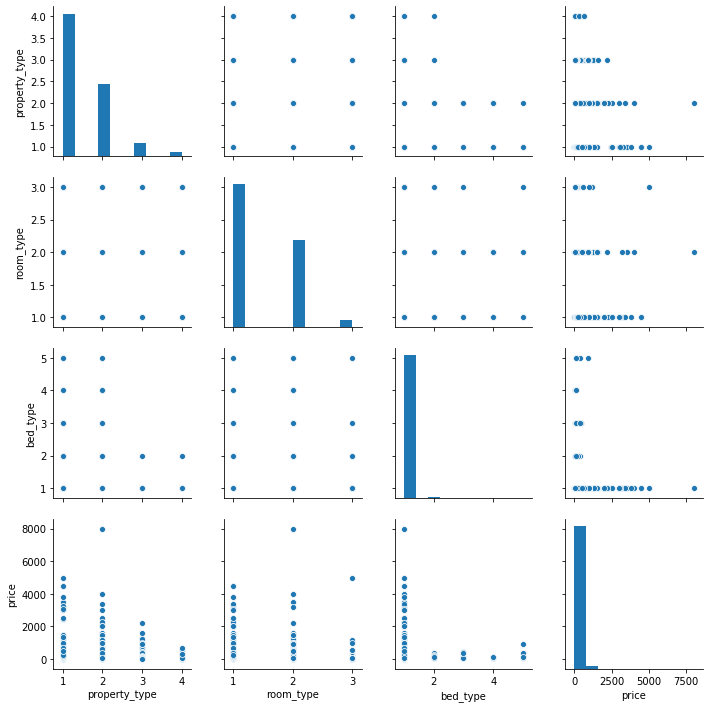

In [19]:
g = sns.pairplot(data_new[['property_type',
                     'room_type',                     
                     'bed_type',               
                     'price'
                     ]])

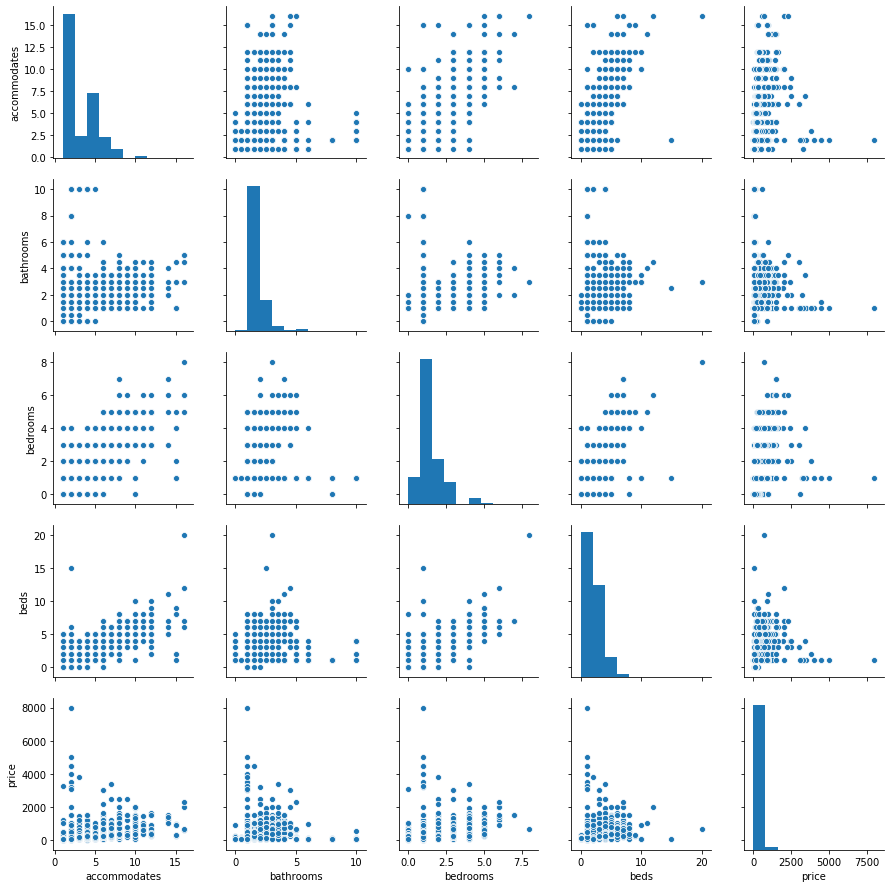

In [20]:
g = sns.pairplot(data_new[['accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',              
                     'price'
                     ]])

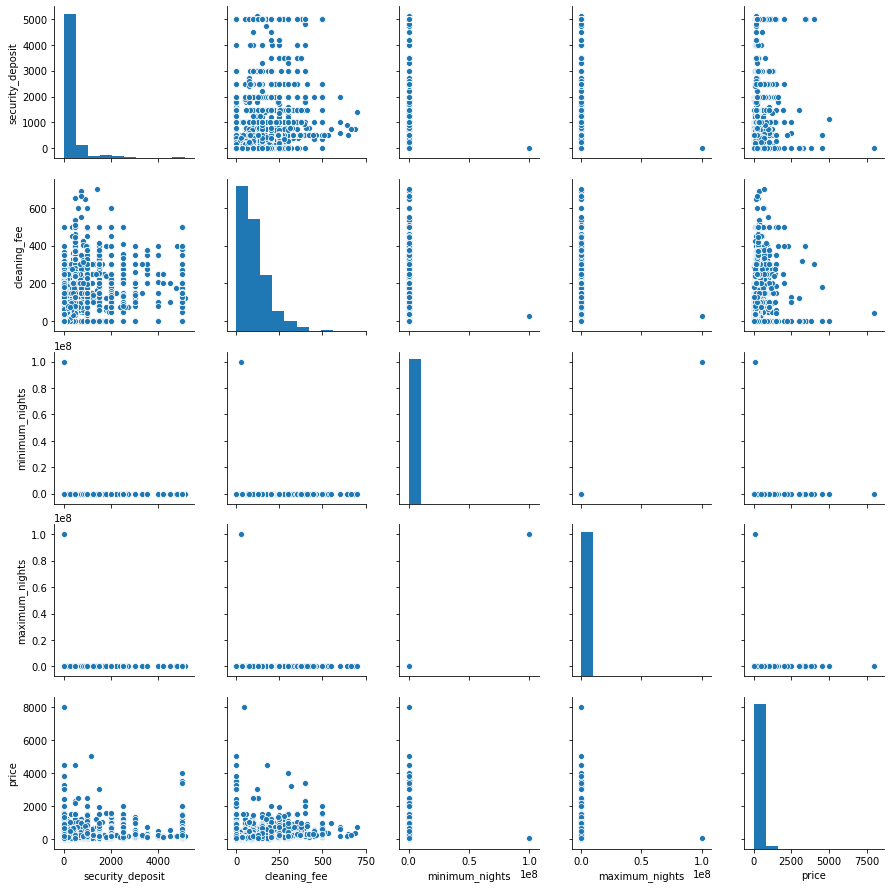

In [21]:
g = sns.pairplot(data_new[['security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                    'price'
                     ]])

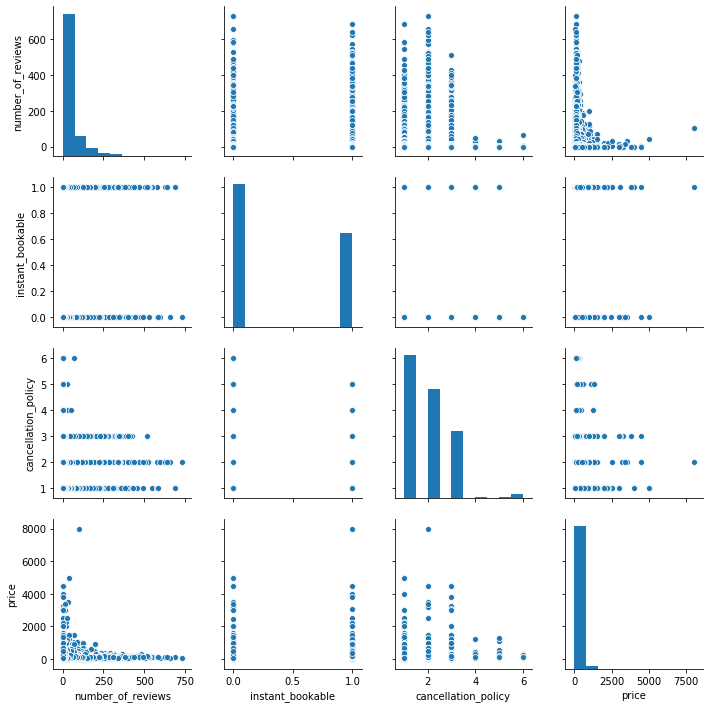

In [22]:
g = sns.pairplot(data_new[['number_of_reviews',
                     'instant_bookable',
                    'cancellation_policy',
                    'price'
                     ]])   

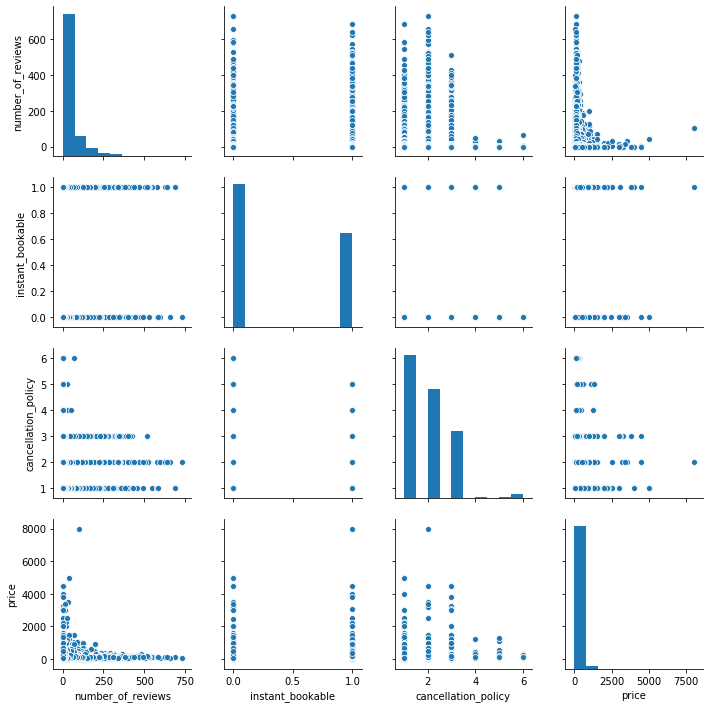

In [23]:
g = sns.pairplot(data_new[['number_of_reviews',
                     'instant_bookable',
                    'cancellation_policy',
                    'price'
                     ]])   

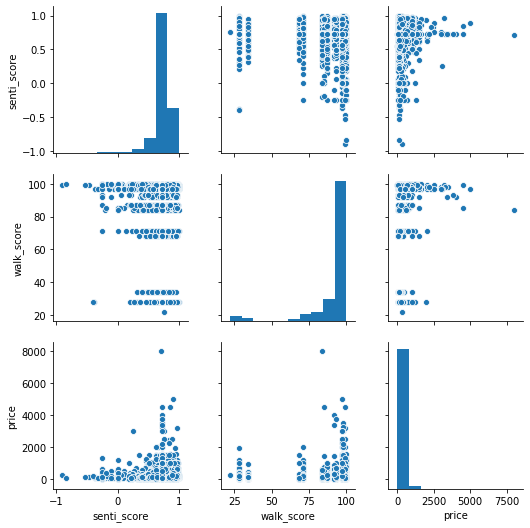

In [24]:
g = sns.pairplot(data_new[['senti_score',
                      'walk_score',
                    'price'
                     ]])  

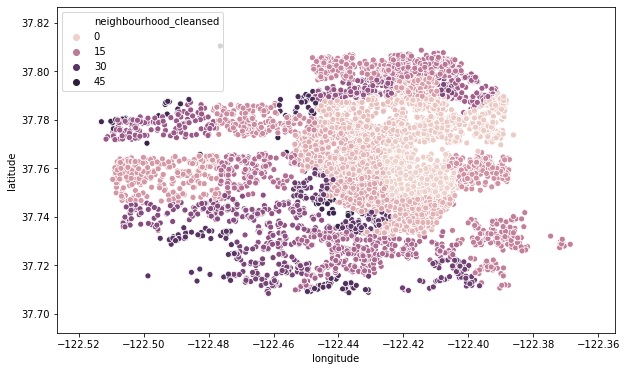

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.neighbourhood_cleansed)
plt.ioff()

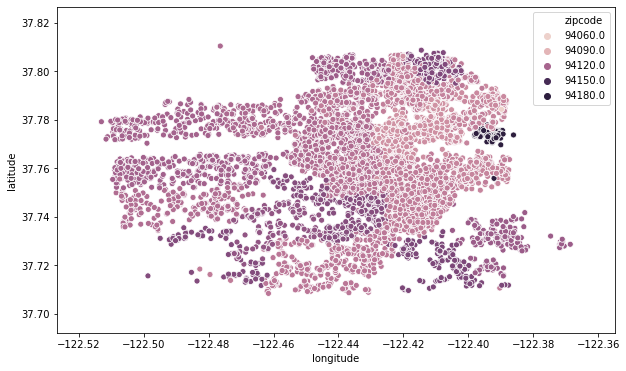

In [26]:
data_new["zipcode"]=data_new["zipcode"].astype("float")
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.zipcode)
plt.ioff()

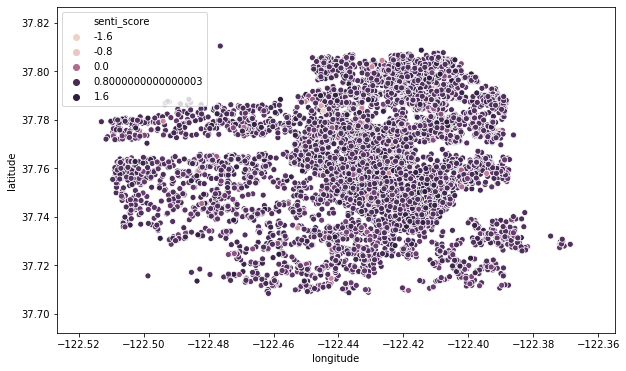

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.senti_score)
plt.ioff()                   

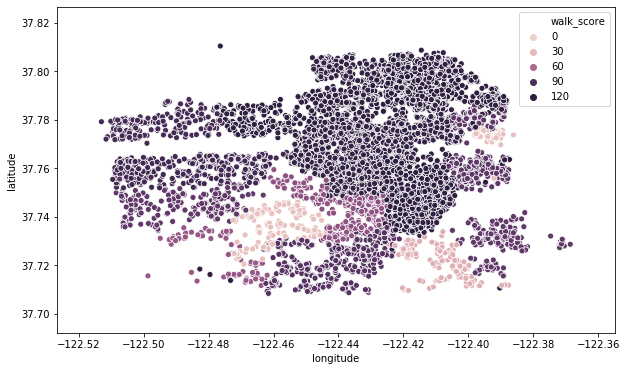

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.walk_score)
plt.ioff()  

In [29]:
p=data_new.price.describe()
print(p)

count    7544.000000
mean      215.797720
std       258.190685
min         0.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      8000.000000
Name: price, dtype: float64


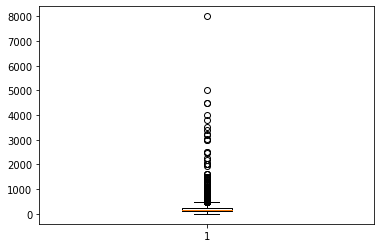

In [30]:
#boxplot of price
plt.boxplot(data_new.price)
plt.show()

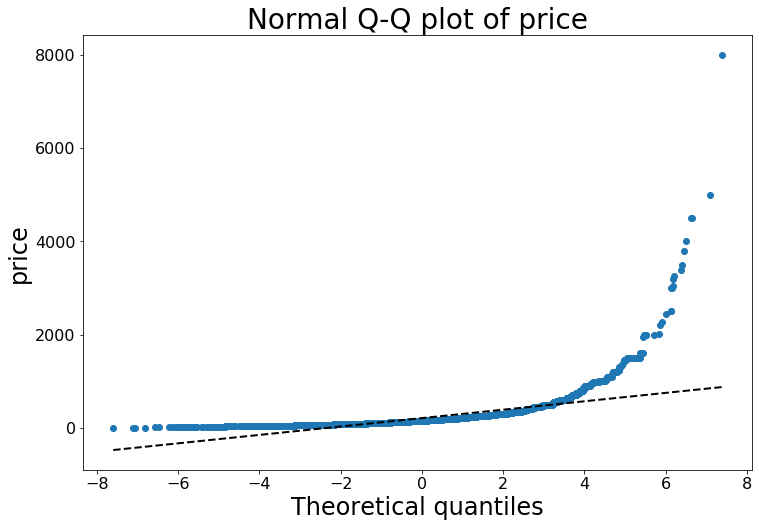

In [31]:
#Normal Q-Q plot of price
price_sort=data_new["price"].sort_values()
norm=rd.normal(0,2,len(price_sort))
norm.sort()

plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,price_sort,"o")

#generate a trend line 
z = np.polyfit(norm,price_sort, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot of price", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("price", size=24)
plt.tick_params(labelsize=16)
plt.show()

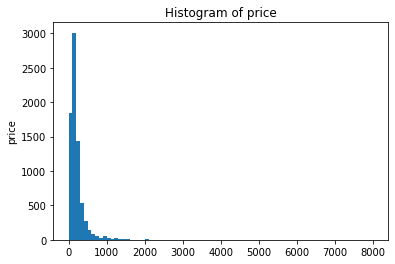

In [32]:
#Histogram
plt.title('Histogram of price')
plt.hist(data_new.price, bins=80)
plt.ylabel('price')
plt.show()

price after Outlier Removal:



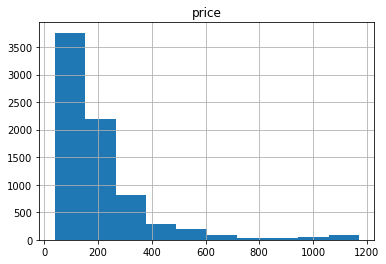

In [33]:
#Outlier Removal:remove 1% of the data from the feature
UPPERBOUND, LOWERBOUND = np.percentile(data_new.price, [1,99])
data_new.price = np.clip(data_new.price, UPPERBOUND, LOWERBOUND)
pd.DataFrame(data_new.price).hist()
print('price after Outlier Removal:\n')

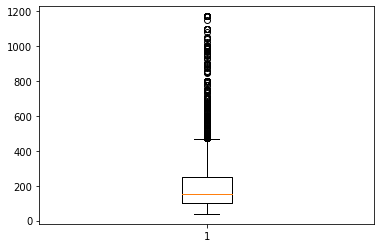

In [34]:
plt.boxplot(data_new.price)
plt.show()

In [35]:
p=data_new.price.describe()
print(p)

count    7544.000000
mean      208.276135
std       182.437391
min        38.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      1171.660000
Name: price, dtype: float64


In [36]:
# bining price
#price_ranges=[p['min']-1,p['mean'],p['max']+1]
#price_labels=['low','high']
# pd.cut(ori_data, bins, labels)
#data_new['price_level']=pd.cut(data_new['price'],price_ranges,labels=price_labels)
data_new['price_level']=pd.cut(data_new['price'],5,precision=1)

In [37]:
data_new['price_level'].value_counts()

(36.9, 264.7]      5952
(264.7, 491.5]     1097
(491.5, 718.2]      286
(944.9, 1171.7]     137
(718.2, 944.9]       72
Name: price_level, dtype: int64

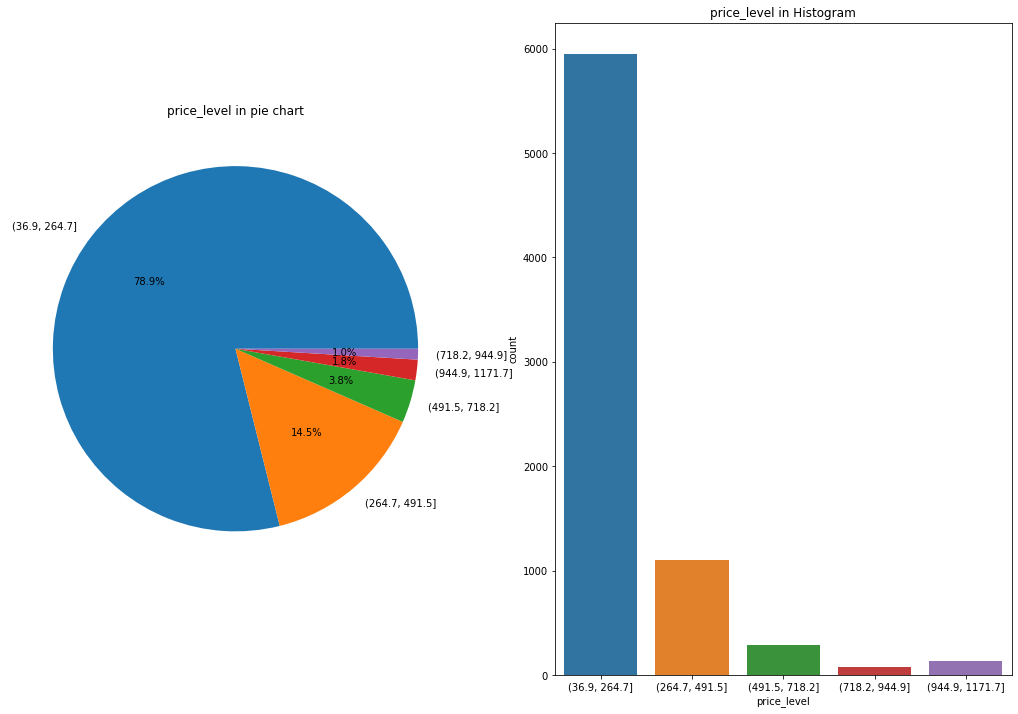

Number of low price(36.9, 264.8] : 5952
Number of medium price(264.8, 491.6]:  1097
Number of high price(491.6, 718.4]  :  286
Number of higher price(718.4, 945.2]:  72
Number of highest price(945.2, 1172.0]:  137


In [38]:
#plot value counts for price_level in pie chart and Histogram
f,ax=plt.subplots(1,2,figsize=(18,12))
data_new['price_level'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].set_title('price_level in pie chart')
ax[0].set_ylabel('')
sns.countplot(label='count',x='price_level',data=data_new,ax=ax[1])
ax[1].set_title('price_level in Histogram')
plt.show()
low_price, medium_price, high_price ,highest_price,higher_price = data_new['price_level'].value_counts()
print("Number of low price(36.9, 264.8] :" , low_price)
print('Number of medium price(264.8, 491.6]: ',medium_price)
print('Number of high price(491.6, 718.4]  : ',high_price)
print('Number of higher price(718.4, 945.2]: ',higher_price)
print('Number of highest price(945.2, 1172.0]: ',highest_price)

In [39]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 28 columns):
id                           7544 non-null int64
host_response_time           7544 non-null int64
host_response_rate           7544 non-null float64
host_is_superhost            7544 non-null int64
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null int64
neighbourhood_cleansed       7544 non-null int64
zipcode                      7544 non-null float64
latitude                     7544 non-null float64
longitude                    7544 non-null float64
property_type                7544 non-null int64
room_type                    7544 non-null int64
accommodates                 7544 non-null int64
bathrooms                    7544 non-null float64
bedrooms                     7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null int64
price                        7544 non-null f

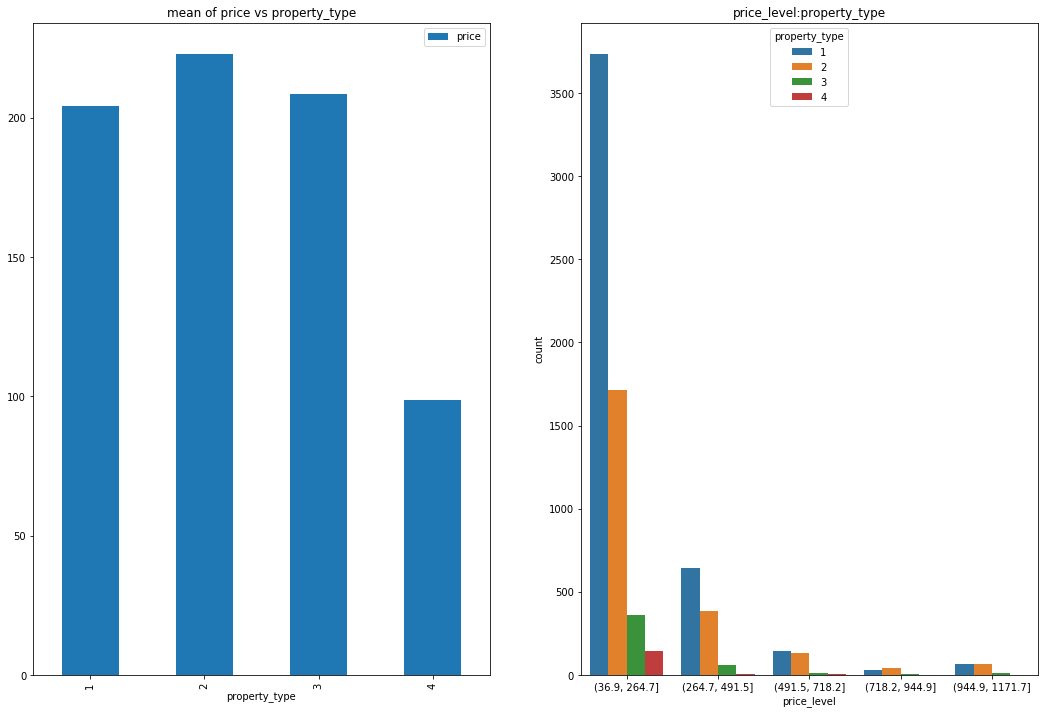

In [40]:
#plot mean of price vs property_type,and price_level:property_type
f,ax=plt.subplots(1,2,figsize=(18,12))
data_new[['price','property_type']].groupby(['property_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('mean of price vs property_type')
sns.countplot('price_level',hue='property_type',data=data_new,ax=ax[1])
ax[1].set_title('price_level:property_type')
plt.show()

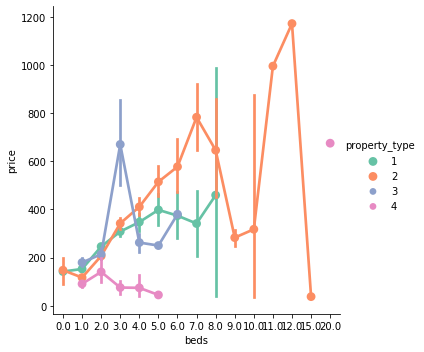

In [41]:
sns.factorplot('beds','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

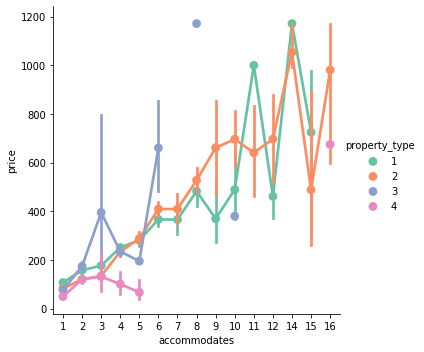

In [42]:
sns.factorplot('accommodates','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

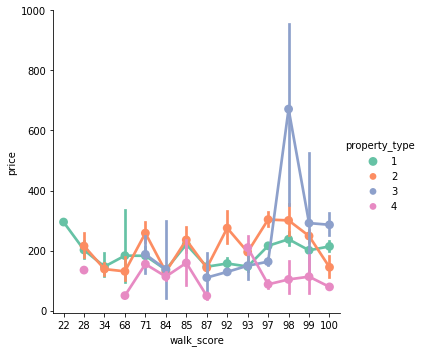

In [43]:
sns.factorplot('walk_score','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

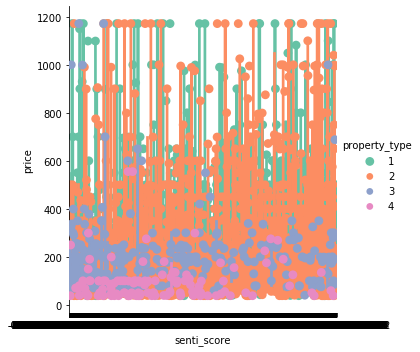

In [44]:
sns.factorplot('senti_score','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

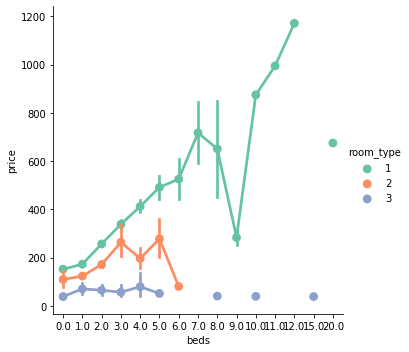

In [45]:
sns.factorplot('beds','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

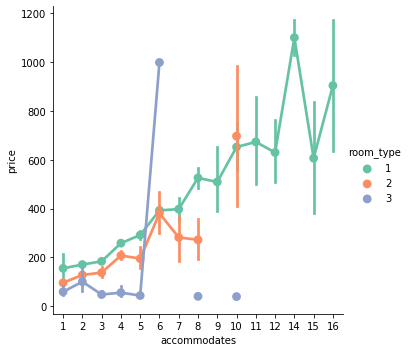

In [46]:
sns.factorplot('accommodates','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

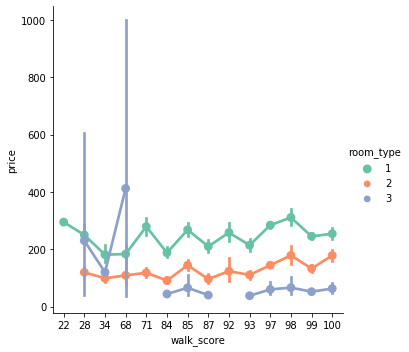

In [47]:
sns.factorplot('walk_score','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

In [ ]:
sns.factorplot('senti_score','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

In [62]:
data_new.shape

(7544, 28)

In [ ]:
data_new.to_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v9/data_selected1.csv')

In [63]:
#PCA
#select necessary columns for Prediction
# latitude' ,'longitude' and  'neighbourhood_cleansed'are similar with'zipcode' 
# 'host_response_time','host_response_rate','number_of_reviews' can't be known before listing
data_PCA= data_new.loc[:,['price',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'zipcode',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',                     
                     'instant_bookable',
                      'cancellation_policy',
                      'senti_score',
                      'walk_score' ]]
data_PCA.shape

(7544, 20)

In [64]:
data_PCA.head()

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,senti_score,walk_score
0,170.0,1,1.0,1,94117.0,1,1,3,1.0,1.0,2.0,1,100.0,100.0,1,30,1,2,0.769675,97
1,99.0,1,2.0,1,94131.0,2,2,2,1.0,1.0,1.0,1,0.0,10.0,1,5,0,1,0.796945,71
2,65.0,1,10.0,1,94117.0,1,2,2,4.0,1.0,1.0,1,200.0,50.0,32,60,0,1,0.715800,97
3,65.0,1,10.0,1,94117.0,1,2,2,4.0,1.0,1.0,1,200.0,50.0,32,90,0,1,0.763887,97
4,475.0,0,2.0,1,94117.0,2,1,4,1.5,2.0,2.0,1,0.0,225.0,4,1125,0,2,0.928354,97


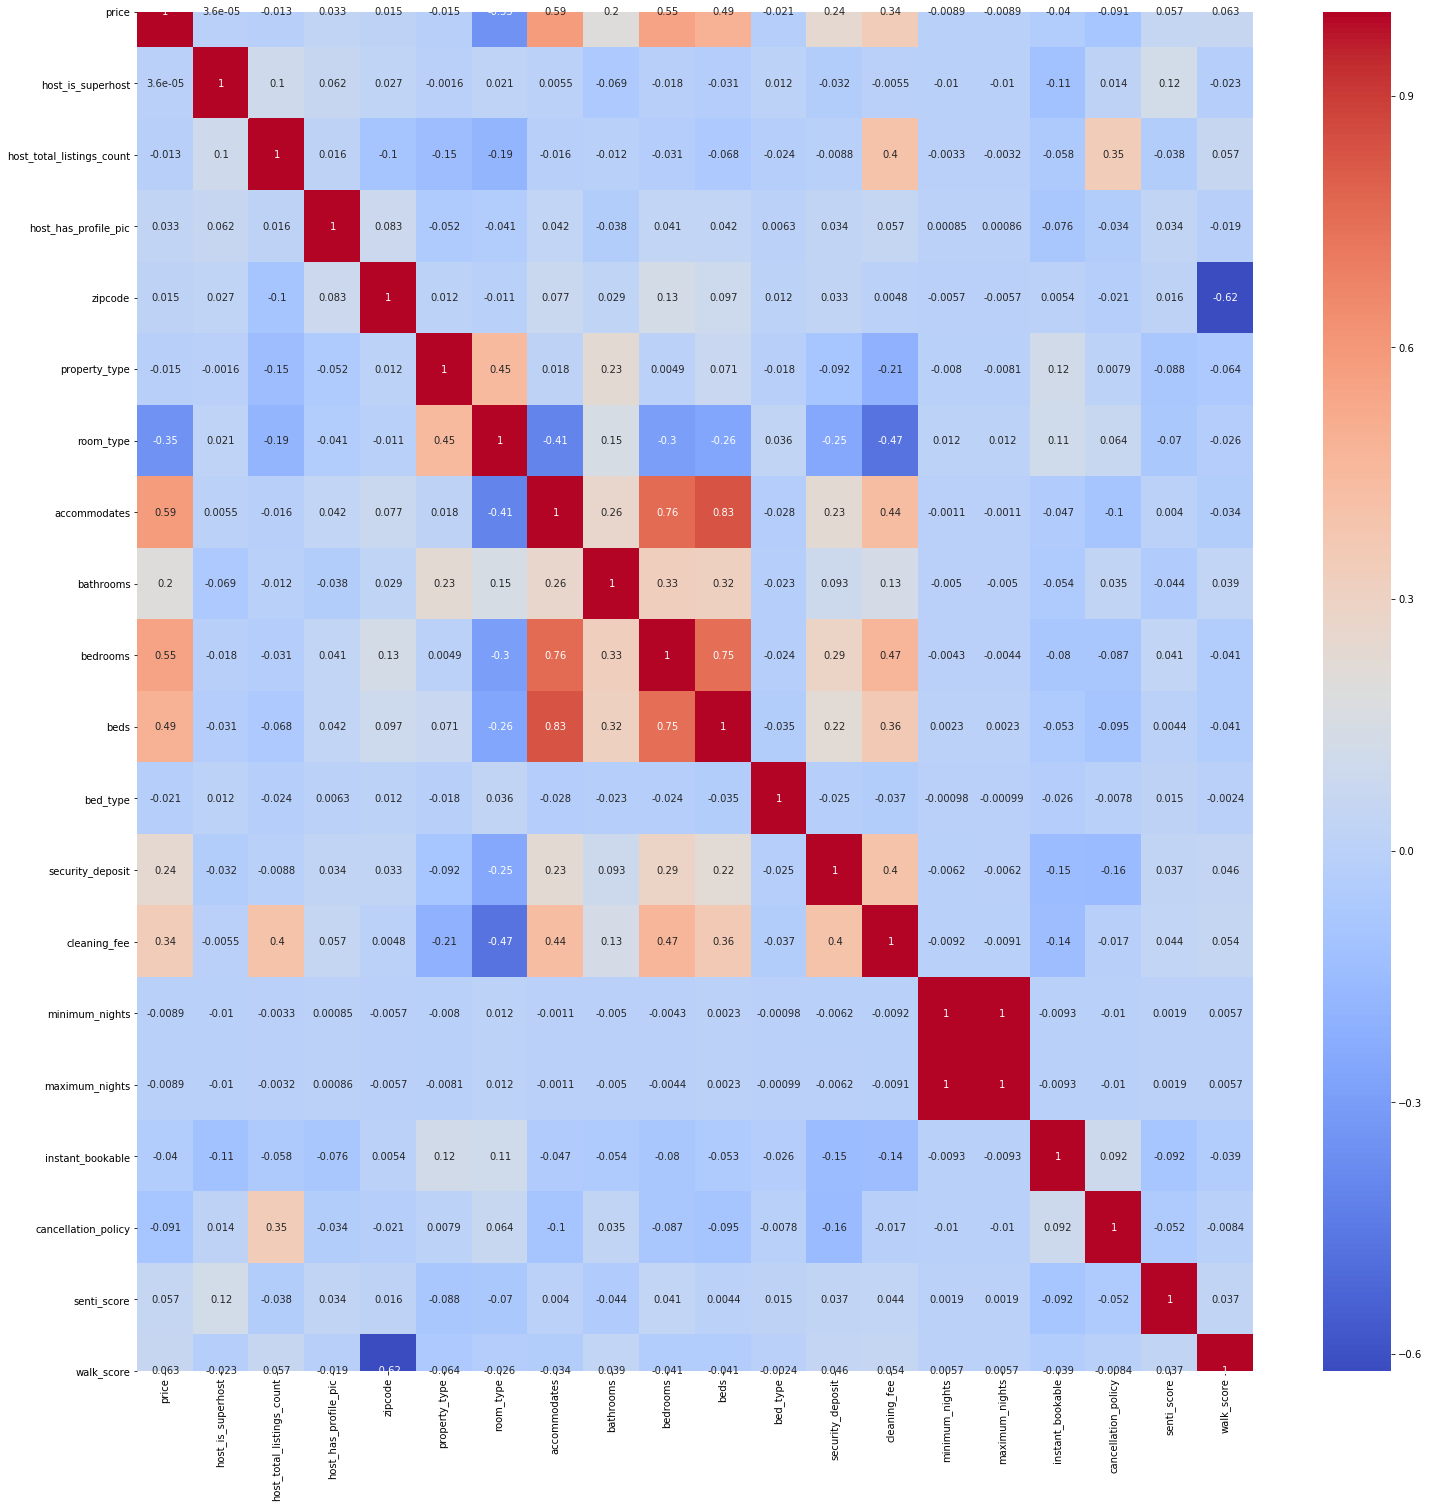

In [65]:
"""
When encountering a high degree of correlation between variables, 
the conventional approach is to calculate the correlation matrix between the variables,
then find two variables with a correlation higher than a certain value (such as 0.75),
and then delete one of them.
"""

#calculating the correlation between features
correlation=data_PCA.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [66]:
#drop the variables with a correlation higher than 0.75 (here we set it to 0.75)
data_PCA.drop(['accommodates','bedrooms','maximum_nights'], axis=1, inplace=True)

In [67]:
data_PCA.shape

(7544, 17)

In [68]:
data_PCA.to_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v8/data_selected2.csv')

In [69]:
data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 17 columns):
price                        7544 non-null float64
host_is_superhost            7544 non-null int64
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null int64
zipcode                      7544 non-null float64
property_type                7544 non-null int64
room_type                    7544 non-null int64
bathrooms                    7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null int64
security_deposit             7544 non-null float64
cleaning_fee                 7544 non-null float64
minimum_nights               7544 non-null int64
instant_bookable             7544 non-null int64
cancellation_policy          7544 non-null int64
senti_score                  7544 non-null float64
walk_score                   7544 non-null int64
dtypes: float64(8), int64(9)
memory usage: 1

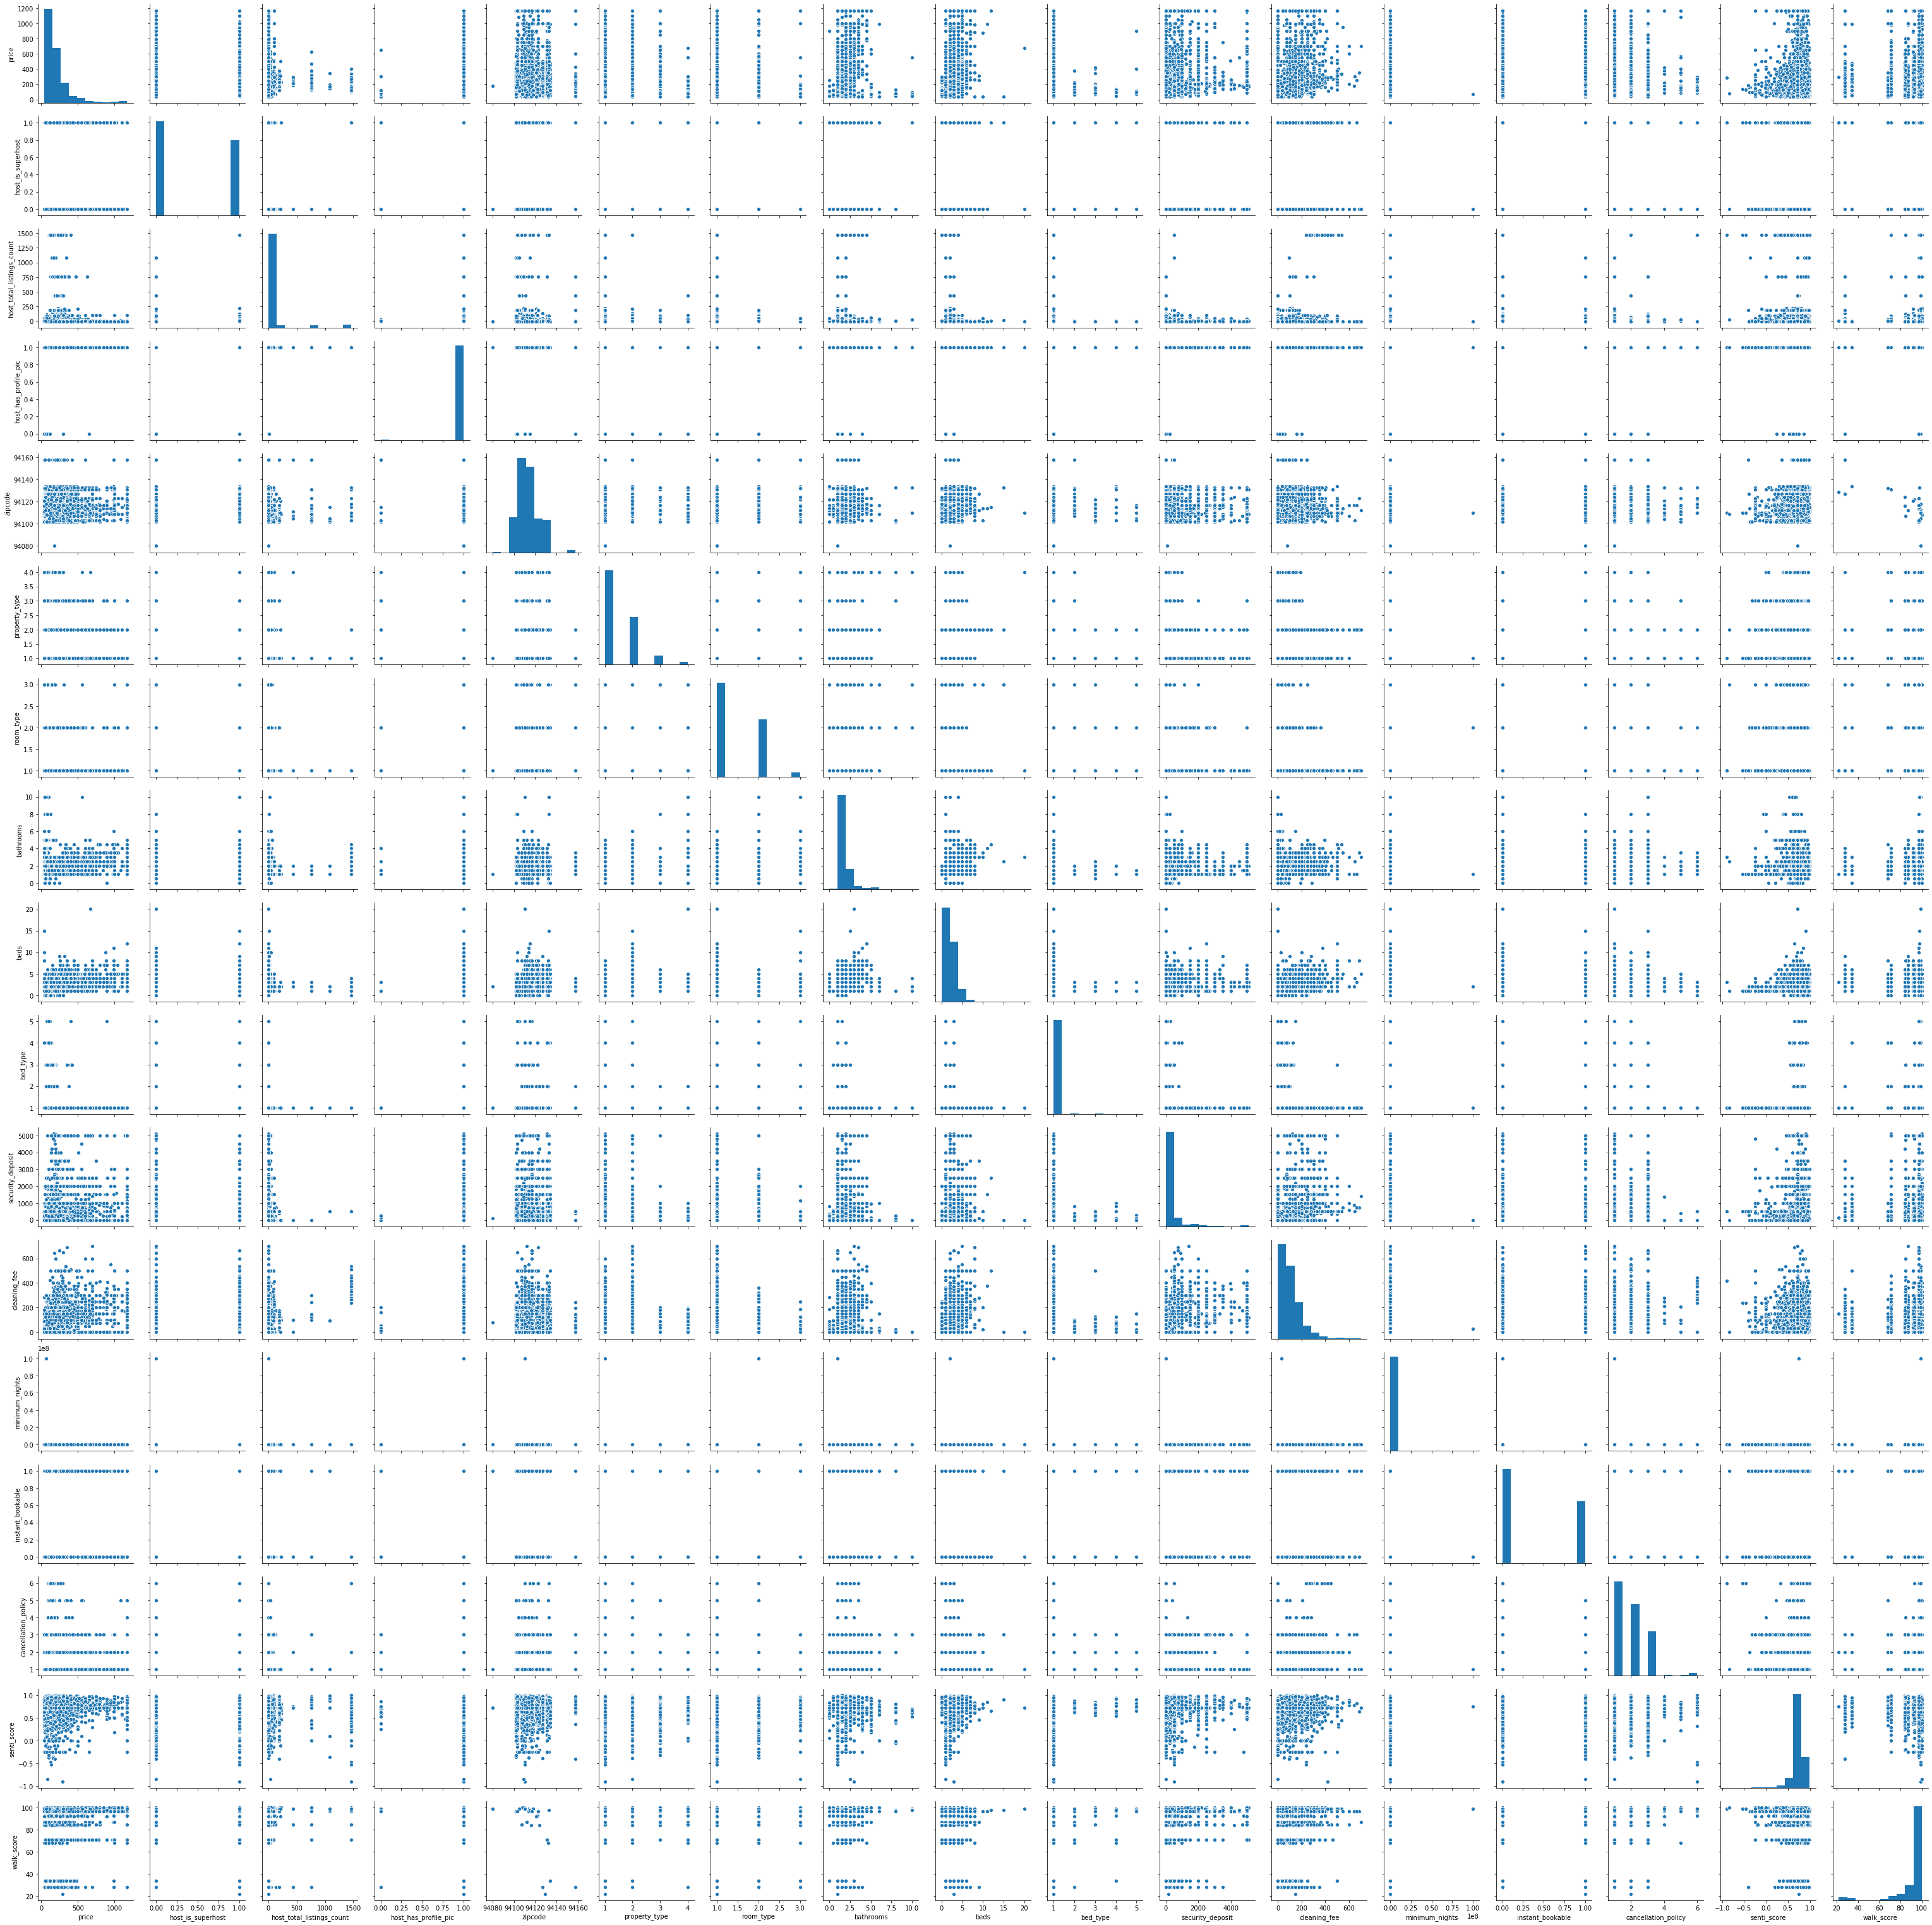

In [70]:
g = sns.pairplot(data_PCA)

In [71]:
# split into training and testing datasets
X = data_PCA_out.iloc[:, 1:].values
y=  data_PCA_out["price"].values
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.5, random_state=1)
print(X_train)
print(y_train)

[[ 0.          3.          1.         ...  2.          0.66982917
  84.        ]
 [ 1.          1.          1.         ...  2.          0.71893214
  99.        ]
 [ 0.          3.          1.         ...  1.          0.7906
  99.        ]
 ...
 [ 0.          1.          1.         ...  1.          0.69813333
  84.        ]
 [ 1.          1.          1.         ...  2.          0.8018283
  85.        ]
 [ 0.          4.          1.         ...  1.          0.72555455
  99.        ]]
[199. 175. 220. ... 209. 150.  98.]


In [72]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[-1.0047809  -0.11919485  0.         ...  0.24475373 -0.88709522
  -1.38351959]
 [ 0.99524184 -0.44393143  0.         ...  0.24475373 -0.33136596
   0.71284004]
 [-1.0047809  -0.11919485  0.         ... -1.03549657  0.47974426
   0.71284004]
 ...
 [-1.0047809  -0.44393143  0.         ... -1.03549657 -0.56675917
  -1.38351959]
 [ 0.99524184 -0.44393143  0.         ...  0.24475373  0.60682201
  -1.24376228]
 [-1.0047809   0.04317344  0.         ... -1.03549657 -0.25641606
   0.71284004]]


In [73]:
#obtain the eigenpairs of the Wine covariance matrix:
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [74]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[2.52647767 1.63678305 1.49242074 1.2282545  1.05510368 0.41662557
 0.44939661 0.50758437 0.56002248 0.96691486 0.90463724 0.82701742
 0.71176564 0.72256277 0.         0.        ] -> eigenvalues
[18.03909643 11.68666073 10.65591119  8.76975944  7.53345945  2.97471412
  3.20869998  3.62416165  3.99857067  6.90378967  6.45912633  5.90491939
  5.08201961  5.15911133  0.          0.        ]  -> percent of variability explained


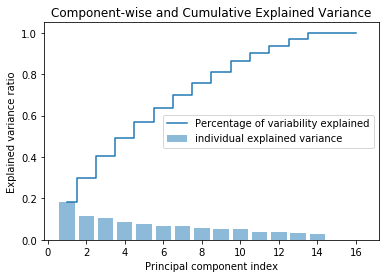

In [75]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(1,17), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,17), cum_var_exp, where='mid',label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

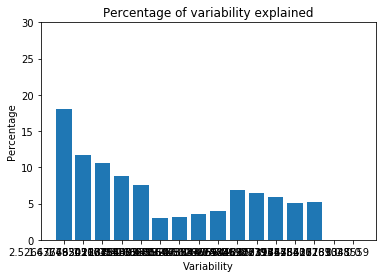

In [76]:
plt.bar(np.arange(len(w)),list(w_percent))
plt.xticks(np.arange(len(w)),list(w))
plt.title("Percentage of variability explained")
plt.xlabel("Variability")
plt.ylabel("Percentage")
plt.ylim(ymax = 30)
plt.show()

In [80]:
data_PCA.columns.values

array(['price', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'zipcode', 'property_type', 'room_type',
       'bathrooms', 'beds', 'bed_type', 'security_deposit',
       'cleaning_fee', 'minimum_nights', 'instant_bookable',
       'cancellation_policy', 'senti_score', 'walk_score'], dtype=object)